In [138]:
# Імпортуємо бібліотеки для роботи
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [139]:
# Функція для виведення візуалізації
# ..узагальнемо дії, описані для S&P500
def display_info(data, bins, tail=0.15, column="Adj Close**"):

    data['Efficiency'] = (data[column] - data[column].shift(1)) / data[column]


    expected_efficiency = np.round(data['Efficiency'].sum() / (N - 1), 5)
    print("Expected efficiency:", expected_efficiency)

    volatility = np.round(np.sqrt(((data["Efficiency"] - expected_efficiency)**2).sum() / (N - 1)), 5)
    print("Volatility of efficiency:", volatility)


    confidence_intervals = [0.95, 0.99]
    VaR = [np.percentile(data['Efficiency'][1:], 100 - _ * 100) for _ in confidence_intervals]
    print("Values at Risk - 95%, 99%:", VaR)

    x_axis = np.arange(-tail, tail, 0.001)
    plt.figure(figsize=(7, 5))
    plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency,volatility))
    plt.hist(data['Efficiency'], bins=bins)
    for _, interval in enumerate(confidence_intervals):
        plt.axvline(VaR[_], color='r', alpha=1/np.exp(_), linestyle='dashed', label=f"Value at Risk at {interval:.0%}")
    plt.legend()
    
    return expected_efficiency, volatility

### S&P500

In [140]:
# Імпортуємо дані - по дням та місяцям
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="SP500_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="SP500_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-10-13,4360.49,4377.10,4311.97,4327.78,4327.78,2285325000
1,2023-10-12,4380.94,4385.85,4325.43,4349.61,4349.61,3713140000
2,2023-10-11,4366.59,4378.64,4345.34,4376.95,4376.95,3601660000


In [141]:
# Приклад роботи покажемо на даних по дням (daily_data):

In [142]:
# Працюватимемо з колонкою 'Adj Close**'
column = 'Adj Close**'

daily_data[column].head(3)

0    4327.78
1    4349.61
2    4376.95
Name: Adj Close**, dtype: float64

In [143]:
# Розрахуємо ефективність як 'Adj Close**'-'Adj Close**', яке зсунуте вліво на 1 позицію (команда shift)
daily_data['Efficiency'] = (daily_data[column] - daily_data[column].shift(1)) / daily_data[column]
daily_data['Efficiency'].head(3)

0         NaN
1    0.005019
2    0.006246
Name: Efficiency, dtype: float64

In [144]:
# Параметр N - скільки записів ми маємо в таблиці
N = len(daily_data['Efficiency'])
print(N)

251


In [145]:
# Мат. очікування ефективності - скоректоване середнє арифметичне (з N-1)
expected_efficiency_daily = np.round( daily_data['Efficiency'].sum() / (N - 1), 5)
print("Expected efficiency:", expected_efficiency_daily)

Expected efficiency: -0.00081


In [146]:
# Розрахуємо волатильність по формулі - для цього від ефективності віднімемо (ефективність) ** 2
# далі кожне значення в модуль та рахуємо середнє арифметичне
volatility_daily = np.round(np.sqrt(((daily_data["Efficiency"] - expected_efficiency_daily)**2).sum() / (N - 1)), 3)
print("Volatility of efficiency:", volatility_daily)

Volatility of efficiency: 0.01


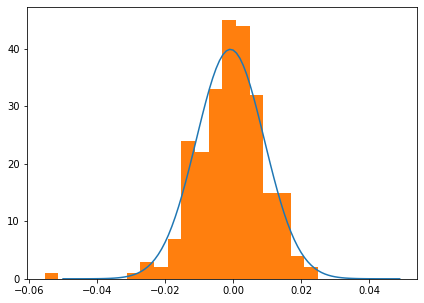

In [147]:
# Порівняємо гістограму для ефективності з нормальним розподілом...
# параметри нормального розподілу mu=Е(Ефективність), sigma=(Волатильність)
x_axis = np.arange(-0.05, 0.05, 0.001)

plt.figure(figsize=(7, 5))
plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency_daily,volatility_daily))
plt.hist(daily_data['Efficiency'], bins=20)
plt.show()

In [148]:
# Перейдемо до пошуку Value at Risk;
# Знайдемо для 95% та 99% рівнів значимості:
# обраховуємо за допомогою 1-p перцентилів
confidence_intervals = [0.95, 0.99]

VaR = [np.percentile(daily_data['Efficiency'][1:], 100 - _ * 100) for _ in confidence_intervals]
print(VaR)

[-0.01621316247695521, -0.02557176767868708]


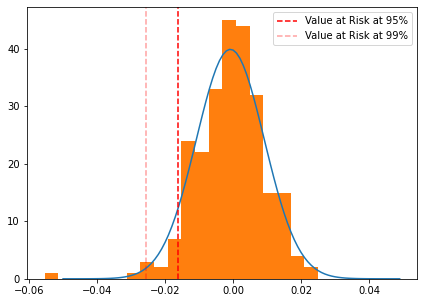

In [149]:
# Порівняння графіків та різні Value at Risk:
x_axis = np.arange(-0.05, 0.05, 0.001)

plt.figure(figsize=(7, 5))
plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency_daily,volatility_daily))
plt.hist(daily_data['Efficiency'], bins=20)
for _, interval in enumerate(confidence_intervals):
    plt.axvline(VaR[_], color='r', alpha=1/np.exp(_), linestyle='dashed', label=f"Value at Risk at {interval:.0%}")
plt.legend()

Аналогічні дії для даних по місяцям:

Expected efficiency: -0.00081
Volatility of efficiency: 0.017
Values at Risk - 95%, 99%: [-0.042268081851961924, -0.06440724901817729]


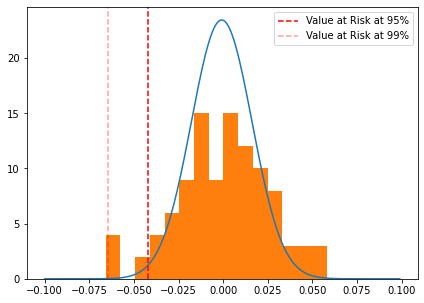

In [150]:
# Скомбінуємо всі команди в одну та подивимось фінальний результат:
weekly_data['Efficiency'] = (weekly_data[column] - weekly_data[column].shift(1)) / weekly_data[column]


expected_efficiency_weekly = np.round( daily_data['Efficiency'].sum() / (N - 1), 5)
print("Expected efficiency:", expected_efficiency_daily)

volatility_weekly = np.round(np.sqrt(((weekly_data["Efficiency"] - expected_efficiency_weekly)**2).sum() / (N - 1)), 3)
print("Volatility of efficiency:", volatility_weekly)


confidence_intervals = [0.95, 0.99]
VaR = [np.percentile(weekly_data['Efficiency'][1:], 100 - _ * 100) for _ in confidence_intervals]
print(f"Values at Risk - 95%, 99%: {VaR}")

x_axis = np.arange(-0.1, 0.1, 0.001)
plt.figure(figsize=(7, 5))
plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency_weekly,volatility_weekly))
plt.hist(weekly_data['Efficiency'], bins=15)
for _, interval in enumerate(confidence_intervals):
    plt.axvline(VaR[_], color='r', alpha=1/np.exp(_), linestyle='dashed', label=f"Value at Risk at {interval:.0%}")
plt.legend()

In [151]:
# Таблиця з даними S&P500 для ефективності та волатильності:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility']
            )

,Daily,Weekly
Efficiency,-0.00081,-0.00081
Volatility,0.01000,0.01700


Аналогічні дії виконаємо для інших фінансових інструментів: 
+ Акції - Amazon
+ Бонди - BND
+ Золото - Gold
+ Криптовалюти - BTC

### Amazon 

In [152]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="AMZN_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="AMZN_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,114.099998,114.959999,106.599998,106.900002,106.900002,67737300
1,2022-10-17,110.110001,114.190002,110.089996,113.790001,113.790001,62782000
2,2022-10-18,119.059998,119.519997,114.790001,116.360001,116.360001,65607400


Expected efficiency: 0.00049
Volatility of efficiency: 0.02378
Values at Risk - 95%, 99%: [-0.03690712339581437, -0.05461105650876616]


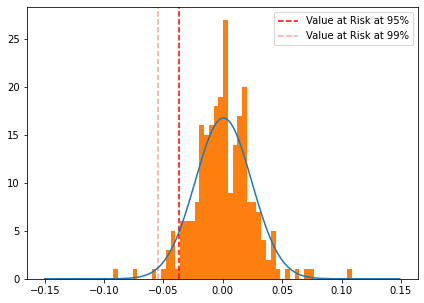

In [153]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=50, column='Adj Close')

Expected efficiency: -0.00169
Volatility of efficiency: 0.03487
Values at Risk - 95%, 99%: [-0.08696488274734901, -0.15316619908072387]


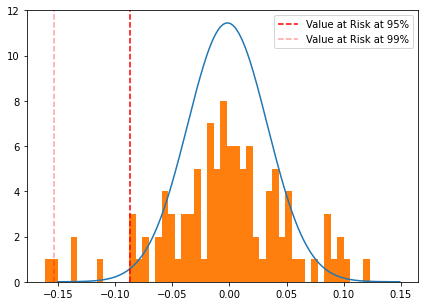

In [154]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=50, column='Adj Close')

In [155]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,0.00049,-0.00169
Volatility,0.02378,0.03487


### BND

In [156]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BND_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BND_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,70.820000,70.830002,70.089996,70.120003,68.062927,6544400
1,2022-10-17,70.550003,70.680000,70.269997,70.269997,68.208542,19605200
2,2022-10-18,70.459999,70.540001,70.139999,70.430000,68.363838,7008000


Expected efficiency: 7e-05
Volatility of efficiency: 0.0047
Values at Risk - 95%, 99%: [-0.006852391250136133, -0.008847091853684761]


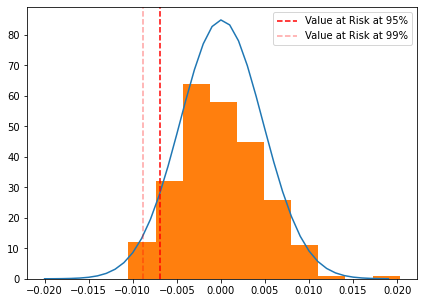

In [157]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=10, tail=0.02, column='Adj Close')

Expected efficiency: -0.00062
Volatility of efficiency: 0.00583
Values at Risk - 95%, 99%: [-0.0157128928541089, -0.017536038073596102]


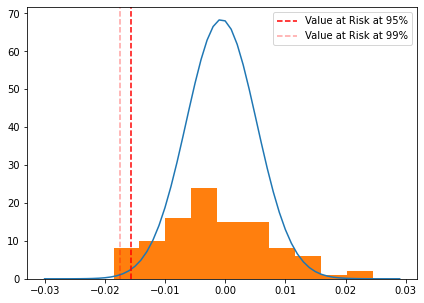

In [158]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=10, tail=0.03, column='Adj Close')

In [159]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,0.00007,-0.00062
Volatility,0.00470,0.00583


### Gold

In [160]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="Gold_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="Gold_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-10-13,1877.5,1930.1,1877.5,1927.4,1927.4,46
1,2023-10-12,1874.7,1881.2,1867.0,1869.3,1869.3,46
2,2023-10-11,1869.5,1874.6,1869.1,1872.8,1872.8,65


Expected efficiency: -0.00068
Volatility of efficiency: 0.00881
Values at Risk - 95%, 99%: [-0.015686641057342462, -0.02724474347239699]


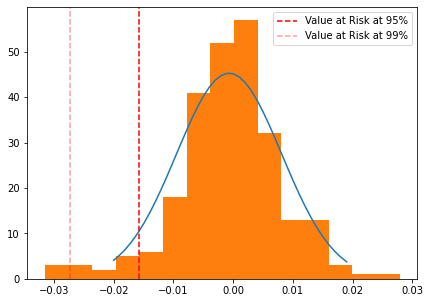

In [161]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=15, tail=0.02, column='Adj Close**')

Expected efficiency: -0.0004
Volatility of efficiency: 0.01232
Values at Risk - 95%, 99%: [-0.02896593148464985, -0.05582047327850501]


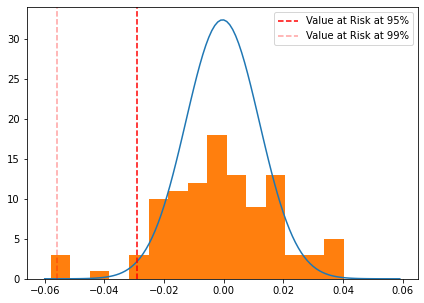

In [162]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=15, tail=0.06, column='Adj Close**')

In [163]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,-0.00068,-0.00040
Volatility,0.00881,0.01232


### Bitcoin

In [164]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BTC_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BTC_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,19382.533203,19889.146484,19115.408203,19185.656250,19185.656250,38452356727
1,2022-10-15,19185.437500,19212.541016,19019.250000,19067.634766,19067.634766,16192235532
2,2022-10-16,19068.914063,19389.603516,19068.914063,19268.093750,19268.093750,17988916650


Expected efficiency: 0.00092
Volatility of efficiency: 0.02912
Values at Risk - 95%, 99%: [-0.03192732069615853, -0.058925864088545]


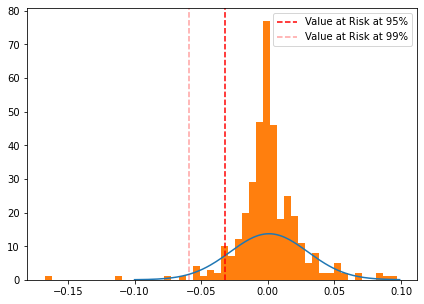

In [165]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=50, tail=0.10, column='Adj Close')

Expected efficiency: -0.00449
Volatility of efficiency: 0.04998
Values at Risk - 95%, 99%: [-0.12945479552868383, -0.27690880462283257]


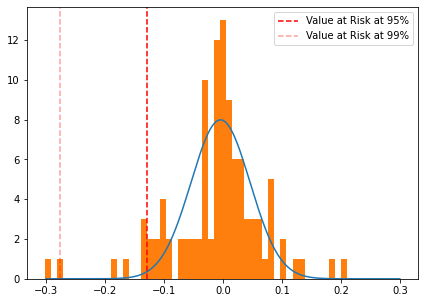

In [166]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=50, tail=0.30, column='Adj Close')

In [167]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,0.00092,-0.00449
Volatility,0.02912,0.04998


### Висновки

1. Гістограми для даних по дням та місяцям будуть відрізнятися; усі активи схильні збільшувати свою волатильність при переході від днів до тижнів при незмінній середній ефективності. Середнє значення усіх інструментів коливається близько 0, тому не можна говорити по однозначну "дохідність" певного інструмента.
2. Оцінки для параметрів нормального розподілу як значення середньої ефективності та волатильності виглядають достатньо точними; гістограма повторює нормальний розподіл.
3. Оскільки ефективність (аналог дохідності) коливається близько 0, можемо зробити висновок по надійності активів; бонди (боргові інструменти) виявилися найменш волатильними, що є логічним результатом; S&P500 та золото мають схожі параметри, при цьому S&P500 є менш волатильною за акції Amazon: теж логічний результат, оскільки у випадку S&P500 маємо справу з диверсифікацією, адже розглядаємо не одну, а 500 компаній. Криптовалюти, як і очікувалося, є найбільш волатильними.